In [1]:
# import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.pylab import date2num
from datetime import datetime, timedelta
%matplotlib inline

A50 = pd.read_csv('C:\\Users\\veryv\\OneDrive\\桌面\\MultiChart\\A50\\日盛A50.txt', engine='python')
A50.dropna(how='any',inplace=True)
A50.Date = pd.to_datetime(A50.Date)
A50.head()

,Date,Time,Open,High,Low,Close,Volume
0,2011-06-01,09:05,9245.0,9245.0,9245.0,9245.0,1
1,2011-06-01,09:08,9245.0,9245.0,9230.0,9230.0,2
2,2011-06-01,09:11,9245.0,9245.0,9245.0,9245.0,1
3,2011-06-01,09:13,9230.0,9230.0,9230.0,9230.0,2
4,2011-06-01,09:14,9235.0,9235.0,9235.0,9235.0,1


In [2]:
# Split time
time = A50['Time'].str.split(':', 2, expand = True)
A50['Hour'] = time[0]
A50.sort_values(by=['Hour'])
A50.head()

,Date,Time,Open,High,Low,Close,Volume,Hour
0,2011-06-01,09:05,9245.0,9245.0,9245.0,9245.0,1,09
1,2011-06-01,09:08,9245.0,9245.0,9230.0,9230.0,2,09
2,2011-06-01,09:11,9245.0,9245.0,9245.0,9245.0,1,09
3,2011-06-01,09:13,9230.0,9230.0,9230.0,9230.0,2,09
4,2011-06-01,09:14,9235.0,9235.0,9235.0,9235.0,1,09


In [9]:
# from min k to hour k
import os
import pandas as pd
import datetime

stock = A50.set_index('Date')
period_stock_data = pd.DataFrame()
period_stock_data['open_hour'] = stock.groupby([stock.index,'Hour'])['Open'].first()
period_stock_data['close_hour'] = stock.groupby([stock.index,'Hour'])['Close'].first()
period_stock_data['high_hour'] = stock.groupby([stock.index,'Hour'])['High'].max()
period_stock_data['low_hour'] = stock.groupby([stock.index,'Hour'])['Low'].min()
period_stock_data['volume_hour'] = stock.groupby([stock.index,'Hour'])['Volume'].sum()
period_stock_data.dropna(how='any',inplace=True)
period_stock_data.reset_index(inplace=True)
period_stock_data['Year'] = period_stock_data['Date'].map(lambda x: x.year)
period_stock_data.head()

,Date,Hour,open_hour,close_hour,high_hour,low_hour,volume_hour,Year
0,2011-06-01,09,9245.0,9245.0,9245.0,9185.0,1020,2011
1,2011-06-01,10,9200.0,9200.0,9215.0,9190.0,1024,2011
2,2011-06-01,11,9190.0,9185.0,9215.0,9185.0,566,2011
3,2011-06-01,12,9210.0,9215.0,9225.0,9210.0,153,2011
4,2011-06-01,13,9225.0,9225.0,9225.0,9185.0,685,2011


In [11]:
# Growth rate_hour_change
stock = pd.DataFrame({'Date':period_stock_data.Date,'Close': period_stock_data.close_hour})
stock = stock.set_index('Date')
stock_change = stock.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.
stock_change['Hour'] = pd.DataFrame(period_stock_data.iloc[:, [0,1]]).set_index('Date')
stock_change['Year'] = pd.DataFrame(period_stock_data.iloc[:, [0,-1]]).set_index('Date')
stock_change['Hour'] = stock_change['Hour'].astype(int)
stock_change = stock_change.sort_values(by=['Year','Hour'])
stock_change.head()

,Close,Hour,Year
Date,,,
2011-06-10,0.001119,0,2011
2011-06-16,-0.005063,0,2011
2011-06-18,-0.011455,0,2011
2011-06-22,0.001696,0,2011
2011-06-28,0.000543,0,2011


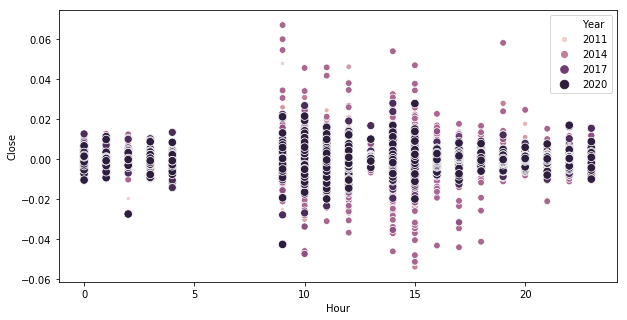

In [12]:
# Stock distribution_day_chage
import seaborn as sns
fig, ax = plt.subplots(figsize = (10,5))
sns.scatterplot(x=stock_change.Hour, y=stock_change.Close,size=stock_change.Year,hue = stock_change.Year)

In [5]:
# from min k to day k
import os
import pandas as pd

stock = A50.set_index('Date')
period_type = 'D'
period_stock_data = stock.resample(period_type,how='last')
period_stock_data['open_day'] = stock['Open'].resample(period_type,how='first')
period_stock_data['close_day'] = stock['Close'].resample(period_type,how='last')
period_stock_data['high_day'] = stock['High'].resample(period_type,how='max')
period_stock_data['low_day'] = stock['Low'].resample(period_type,how='min')
period_stock_data['volume_day'] = stock['Volume'].resample(period_type,how='sum')
period_stock_data.dropna(how='any',inplace=True)
period_stock_data.reset_index(inplace=True)
period_stock_data.head()

C:\Users\veryv\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  import sys
C:\Users\veryv\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).first()
  
C:\Users\veryv\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  if __name__ == '__main__':
C:\Users\veryv\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).max()
  # Remove the CWD from sys.path while we load stuff.
C:\Users\veryv\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).min()
  # This is added back by InteractiveShellApp.init_path()
C:\Users\veryv\Anaconda3\lib\site-packages\ipykernel_launcher.

,Date,Time,Open,High,Low,Close,Volume,Hour,open_day,close_day,high_day,low_day,volume_day
0,2011-06-01,23:17,9150.0,9150.0,9150.0,9150.0,1.0,23,9245.0,9150.0,9245.0,9150.0,4159
1,2011-06-02,22:27,8985.0,8985.0,8975.0,8975.0,15.0,22,9120.0,8975.0,9140.0,8940.0,6532
2,2011-06-03,15:31,9030.0,9030.0,9030.0,9030.0,1.0,15,9010.0,9030.0,9095.0,8995.0,4071
3,2011-06-07,22:47,9065.0,9065.0,9065.0,9065.0,2.0,22,9045.0,9065.0,9070.0,9000.0,2800
4,2011-06-08,21:32,9050.0,9050.0,9050.0,9050.0,1.0,21,9095.0,9050.0,9095.0,8950.0,2718


In [7]:
# Over Yesterday
s = pd.Series(period_stock_data.index)
c = []
d = []
for i in period_stock_data.index:
    if i != 2441:
        c.append(period_stock_data.loc[i+1, 'open_day'] > period_stock_data.loc[i, 'close_day'])
        d.append(period_stock_data.loc[i+1, 'open_day'] < period_stock_data.loc[i, 'close_day'])
    else:
        break
print("Over yesterday high:%.2f"% ((sum(c)/2441)*100) + "%")
print("Over yesterday low:%.2f"% ((sum(d)/2441)*100) + "%")

Over yesterday high:28.55%
Over yesterday low:28.92%


In [32]:
# Growth rate_day_change
stock = pd.DataFrame({'Date':period_stock_data.Date,'Close': period_stock_data.close_day})
stock = stock.set_index('Date')
stock_change = stock.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.
stock_change.head()

,Close
Date,
2011-06-01,NaN
2011-06-02,-0.019311
2011-06-03,0.006109
2011-06-07,0.003868
2011-06-08,-0.001656


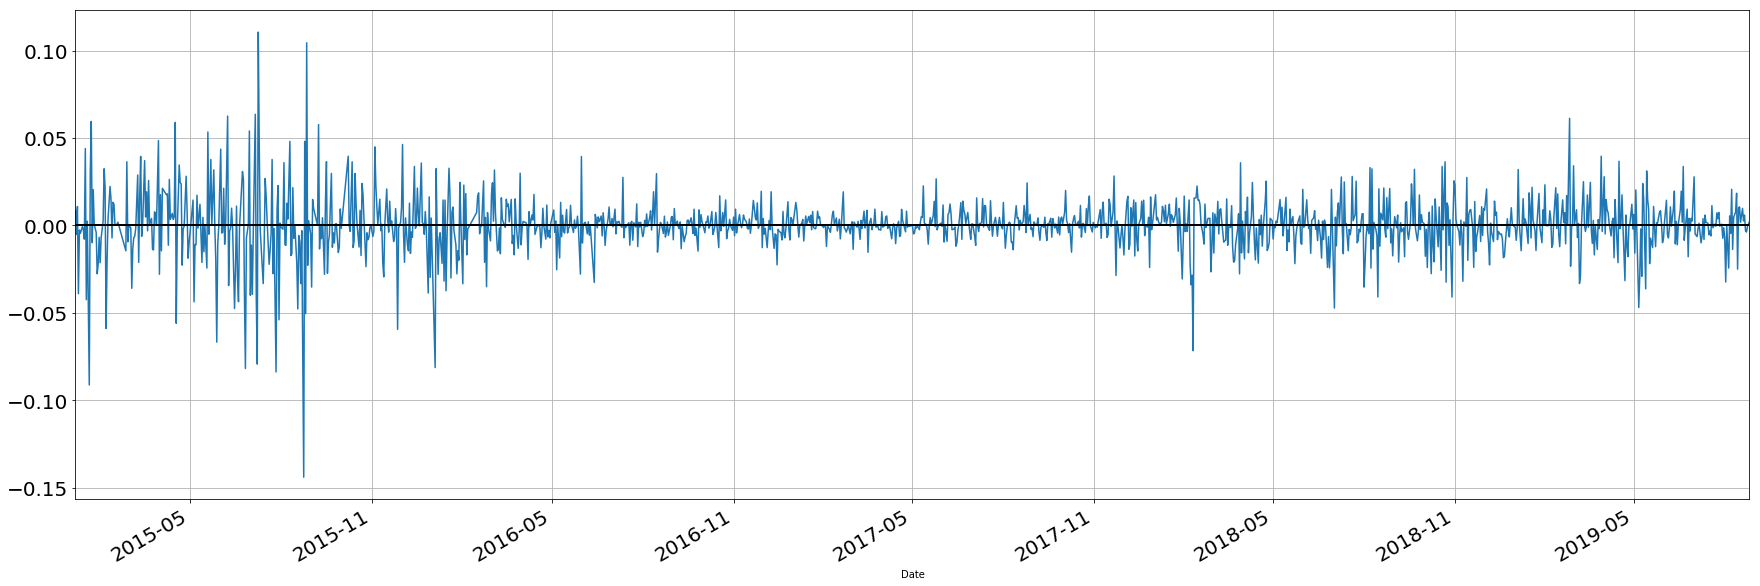

In [35]:
stock_change.loc['2015/01/01':].plot(grid = True,figsize = [30,10],
                                     fontsize = 20, legend = False).axhline(y = 0,color = "black", lw = 2)

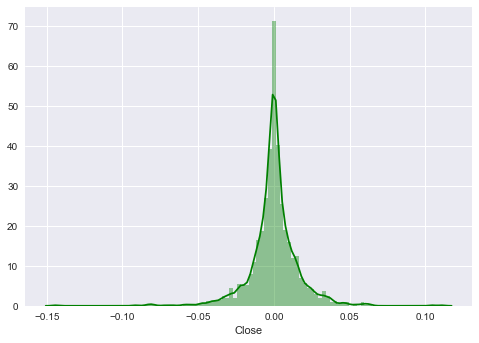

In [36]:
# Stock distribution_day_chage
import seaborn as sns
sns.distplot(stock_change.loc['2015/01/01':]['Close'],color='green',bins=100)

In [13]:
# from min k to week k
import os
import pandas as pd

stock = A50.set_index('Date')
period_type = 'W'
period_stock_data = stock.resample(period_type,how='last')
period_stock_data['open_week'] = stock['Open'].resample(period_type,how='first')
period_stock_data['close_week'] = stock['Close'].resample(period_type,how='last')
period_stock_data['high_week'] = stock['High'].resample(period_type,how='max')
period_stock_data['low_week'] = stock['Low'].resample(period_type,how='min')
period_stock_data['volume_week'] = stock['Volume'].resample(period_type,how='sum')
period_stock_data.dropna(how='any',inplace=True)
period_stock_data.reset_index(inplace=True)
period_stock_data.head()

C:\Users\veryv\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  import sys
C:\Users\veryv\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).first()
  
C:\Users\veryv\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  if __name__ == '__main__':
C:\Users\veryv\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).max()
  # Remove the CWD from sys.path while we load stuff.
C:\Users\veryv\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).min()
  # This is added back by InteractiveShellApp.init_path()
C:\Users\veryv\Anaconda3\lib\site-packages\ipykernel_launcher.

,Date,Time,Open,High,Low,Close,Volume,Hour,open_week,close_week,high_week,low_week,volume_week
0,2011-06-05,15:31,9030.0,9030.0,9030.0,9030.0,1.0,15,9245.0,9030.0,9245.0,8940.0,14762
1,2011-06-12,01:38,8870.0,8870.0,8870.0,8870.0,2.0,01,9045.0,8870.0,9095.0,8825.0,13746
2,2011-06-19,00:44,8680.0,8680.0,8680.0,8680.0,2.0,00,8800.0,8680.0,9055.0,8640.0,22183
3,2011-06-26,01:07,9170.0,9170.0,9170.0,9170.0,4.0,01,8735.0,9170.0,9235.0,8690.0,36707
4,2011-07-03,15:25,9210.0,9230.0,9210.0,9230.0,75.0,15,9140.0,9230.0,9280.0,9045.0,44628


In [14]:
# Over last week
s = pd.Series(period_stock_data.index)
c = []
d = []
for i in period_stock_data.index:
    if i != 425:
        c.append(period_stock_data.loc[i+1, 'open_week'] > period_stock_data.loc[i, 'close_week'])
        d.append(period_stock_data.loc[i+1, 'open_week'] < period_stock_data.loc[i, 'close_week'])
    else:
        break
print("Over last week high:%.2f"% ((sum(c)/426)*100) + "%")
print("Over last week low:%.2f"% ((sum(d)/426)*100) + "%")

Over last week high:48.59%
Over last week low:44.60%


In [38]:
# Growth rate_week_change
stock = pd.DataFrame({'Date':period_stock_data.Date,'Close': period_stock_data.close_week})
stock = stock.set_index('Date')
stock_change = stock.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.
stock_change.head()

,Close
Date,
2011-06-05,NaN
2011-06-12,-0.017878
2011-06-19,-0.021653
2011-06-26,0.054916
2011-07-03,0.006522


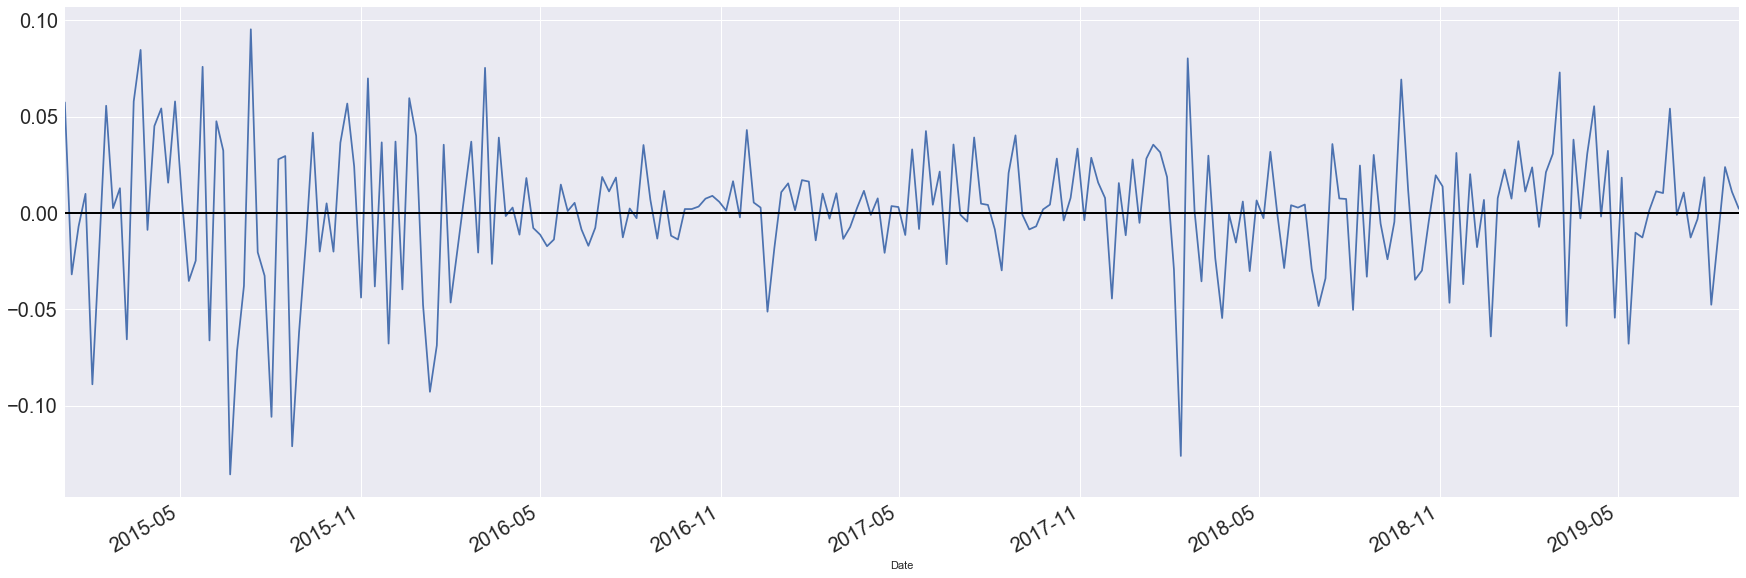

In [39]:
stock_change.loc['2015/01/01':].plot(grid = True,figsize = [30,10],
                                     fontsize = 20, legend = False).axhline(y = 0,color = "black", lw = 2)

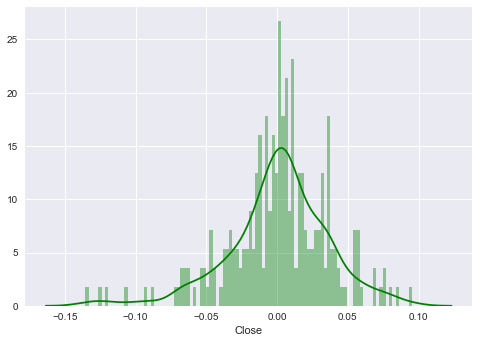

In [40]:
# Stock distribution_week_chage
import seaborn as sns
sns.distplot(stock_change.loc['2015/01/01':]['Close'],color='green',bins=100)

In [15]:
# from min k to month k
import os
import pandas as pd

stock = A50.set_index('Date')
period_type = 'M'
period_stock_data = stock.resample(period_type,how='last')
period_stock_data['open_month'] = stock['Open'].resample(period_type,how='first')
period_stock_data['close_month'] = stock['Close'].resample(period_type,how='last')
period_stock_data['high_month'] = stock['High'].resample(period_type,how='max')
period_stock_data['low_month'] = stock['Low'].resample(period_type,how='min')
period_stock_data['volume_month'] = stock['Volume'].resample(period_type,how='sum')
period_stock_data.dropna(how='any',inplace=True)
period_stock_data.reset_index(inplace=True)
period_stock_data.head()

C:\Users\veryv\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  import sys
C:\Users\veryv\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).first()
  
C:\Users\veryv\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  if __name__ == '__main__':
C:\Users\veryv\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).max()
  # Remove the CWD from sys.path while we load stuff.
C:\Users\veryv\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).min()
  # This is added back by InteractiveShellApp.init_path()
C:\Users\veryv\Anaconda3\lib\site-packages\ipykernel_launcher.

,Date,Time,Open,High,Low,Close,Volume,Hour,open_month,close_month,high_month,low_month,volume_month
0,2011-06-30,23:33,9200.0,9200.0,9200.0,9200.0,2,23,9245.0,9200.0,9280.0,8640.0,129830
1,2011-07-31,21:48,8780.0,8780.0,8780.0,8780.0,1,21,9210.0,8780.0,9480.0,8710.0,133510
2,2011-08-31,23:50,8555.0,8555.0,8555.0,8555.0,1,23,8855.0,8555.0,8980.0,7980.0,202719
3,2011-09-30,15:31,7715.0,7715.0,7715.0,7715.0,61,15,8555.0,7715.0,8580.0,7705.0,176888
4,2011-10-31,21:27,8245.0,8245.0,8245.0,8245.0,2,21,7790.0,8245.0,8550.0,7655.0,166794


In [16]:
# Over last month
s = pd.Series(period_stock_data.index)
c = []
d = []
for i in period_stock_data.index:
    if i != 98:
        c.append(period_stock_data.loc[i+1, 'open_month'] > period_stock_data.loc[i, 'close_month'])
        d.append(period_stock_data.loc[i+1, 'open_month'] < period_stock_data.loc[i, 'close_month'])
    else:
        break
print("Over last month high:%.2f"% ((sum(c)/99)*100) + "%")
print("Over last month low:%.2f"% ((sum(d)/99)*100) + "%")

Over last month high:35.35%
Over last month low:27.27%


In [43]:
# Growth rate_week_change
stock = pd.DataFrame({'Date':period_stock_data.Date,'Close': period_stock_data.close_month})
stock = stock.set_index('Date')
stock_change = stock.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.
stock_change.head()

,Close
Date,
2011-06-30,NaN
2011-07-31,-0.046727
2011-08-31,-0.025961
2011-09-30,-0.103349
2011-10-31,0.066440


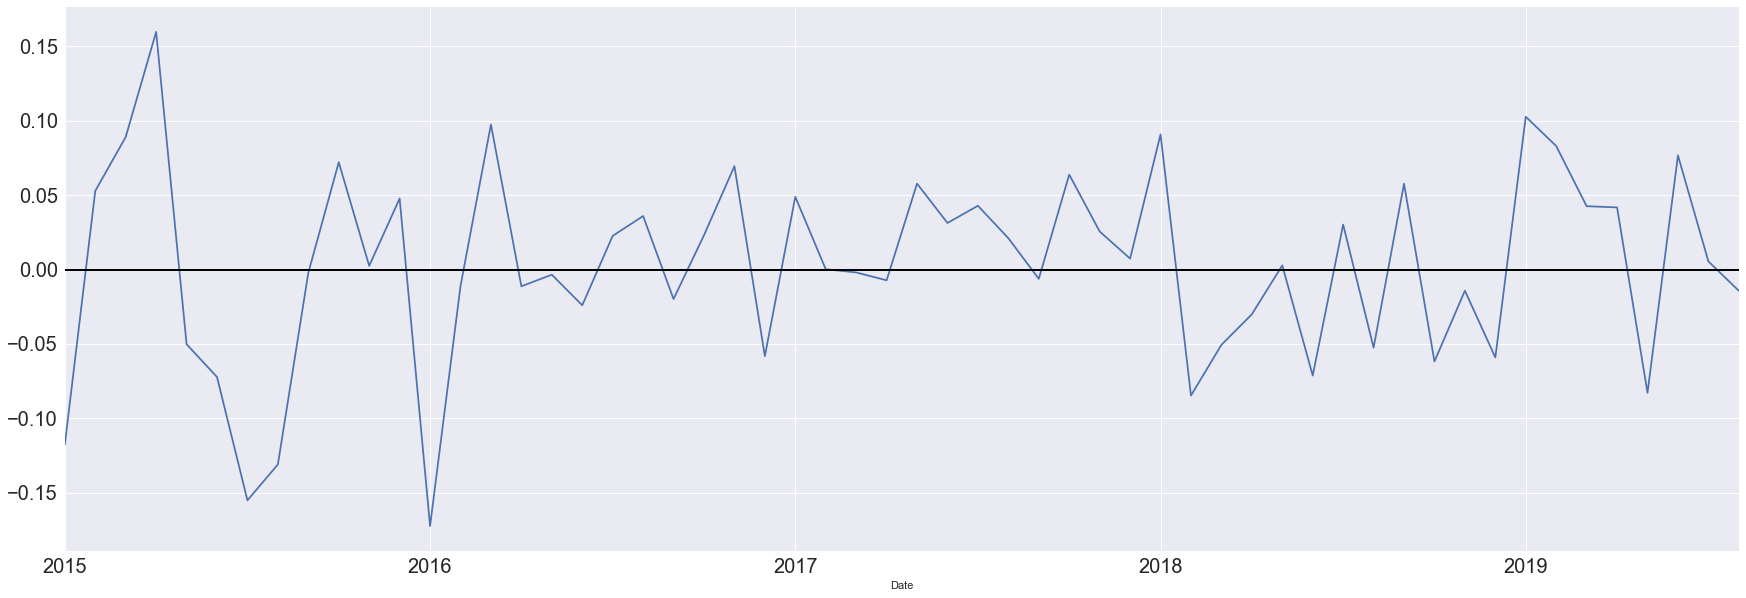

In [44]:
stock_change.loc['2015/01/01':].plot(grid = True,figsize = [30,10],
                                     fontsize = 20, legend = False).axhline(y = 0,color = "black", lw = 2)

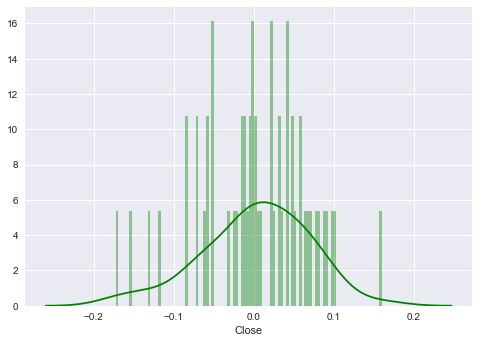

In [45]:
# Stock distribution_month_chage
import seaborn as sns
sns.distplot(stock_change.loc['2015/01/01':]['Close'],color='green',bins=100)